* ML09 ニューラルネットワーク
  * tensorflow をインストールする
  * Google Colab はインストール済み

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from sklearn.datasets import fetch_openml
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 手書き文字のデータセットをダウンロードして、実験用データを準備 (70000枚のうち7000枚を利用)
mnist_data = fetch_openml('Fashion-MNIST', version=1)
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1)

# 特徴量は 0-1 の範囲に正規化、ターゲットは one-hot ベクトル化
x = x / 255
print(x[0])
y = np.identity(10)[y]
print(y[:3])

# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1) # 検証用データに25%を割当て
print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

e:\sudspg\su_dspg_ds\venv\lib\site-packages\pandas\core\arrays\categorical.py:528: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04705882
 0.12156863 0.07058824 0.11372549 0.23921569 0.02745098 0.
 0.         0.         0.00392157 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.45490196 1.         1.         0.9882353
 1.         0.93333334 0.8509804  0.5803922  0.05098039 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.6        0.85490197
 0.9372549  0.9137255  0.7921569  0.         0.654902   0.8784314
 0.8509804  0.91764706 0.8627451  0.6392157  0.04705882 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.29803923 0.8627451  0.9490196  0.8666667  0.8352941  0.85490197
 0.9647059  0.8352

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
mnist_model, accuracy_score: train data : 0.99390  test data : 0.86800
Wall time: 1min 33s


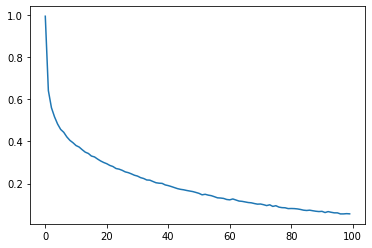

In [3]:
%%time 
# ニューラルネットワークのモデルを作成 (サマリを表示)
mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス
mnist_model.summary()  # 作成したモデルの中身を表示

# 学習時の設定を行い、学習を実施 (学習中のlossの変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0) # fit関数で学習を実施
plt.plot(history.history['loss']) # 学習中のlossの変化をグラフで表示

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')